#Libraries

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Original Image

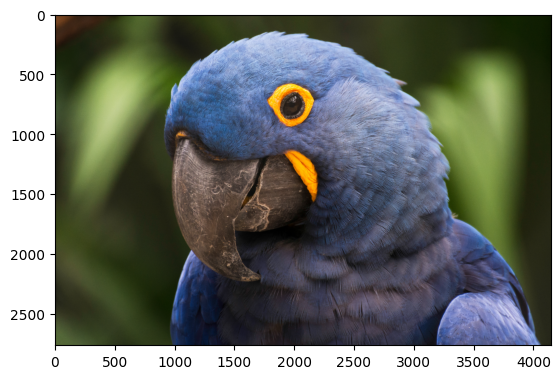

In [2]:
#Load image
original_img = plt.imread('Arara_Azul_no_Pantanal.jpg')

# Visualizing the image
plt.imshow(original_img)

In [3]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (2765, 4147, 3)


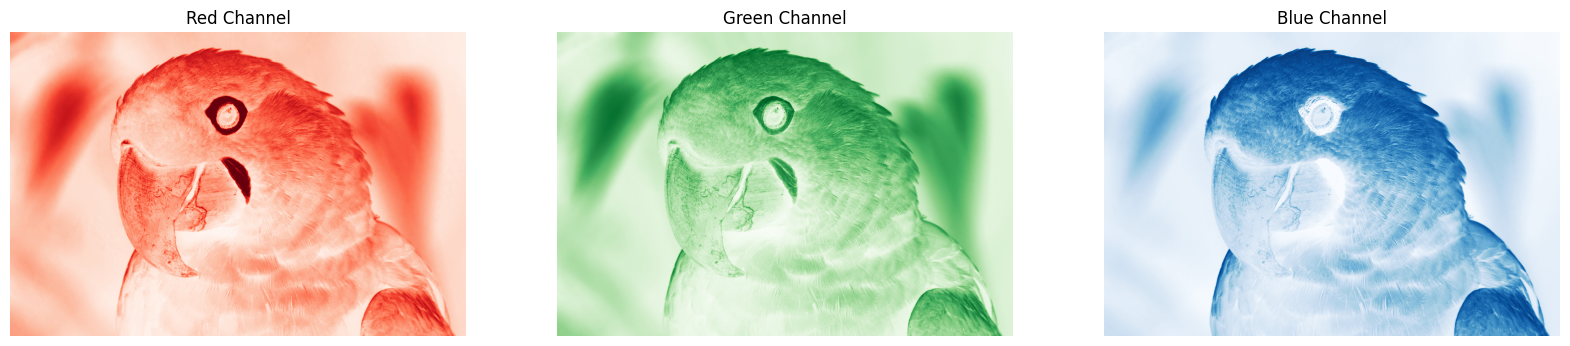

In [4]:
# Load the image
original_img = plt.imread('Arara_Azul_no_Pantanal.jpg')

# Separate channels
blue_channel = original_img[:, :, 2]
green_channel = original_img[:, :, 1]
red_channel = original_img[:, :, 0]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Display blue channel
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

# Display green channel
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

# Display red channel
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

# Show the plot
plt.show()


In [5]:
print(' Blue Channel range:',np.min(blue_channel),np.max(blue_channel),'\n',
      'Green Channel range:',np.min(green_channel),np.max(green_channel),'\n',
      'Red Channel range:',np.min(red_channel),np.max(red_channel),'\n')

 Blue Channel range: 0 255 
 Green Channel range: 0 246 
 Red Channel range: 0 255 



# Clustering

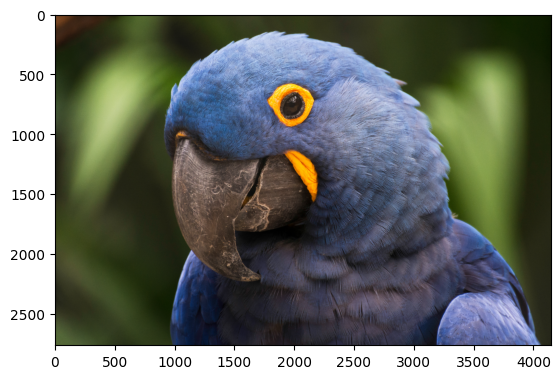

In [6]:
# Podemos perceber que a imagem normalizada permance igual apenas a matriz de pixel foi normalizada 0-1

normalized_img = original_img/255 #normalizando valor
plt.imshow(normalized_img)

In [7]:
# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 2765 x 4147 = 11466455)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(normalized_img, (normalized_img.shape[0] * normalized_img.shape[1], 3))

In [8]:
X_img.shape

(11466455, 3)

In [9]:
kmeans = KMeans(n_clusters=10, random_state=0,max_iter=70, n_init="auto").fit(X_img)

In [10]:
# Cores que o cluster encontrou com base nas cores originais.
kmeans.cluster_centers_.shape

(10, 3)

In [11]:
kmeans.cluster_centers_

array([[0.18387616, 0.18786843, 0.24733393],
       [0.58253539, 0.64963828, 0.38120305],
       [0.6486989 , 0.7080849 , 0.85730304],
       [0.35037149, 0.40581566, 0.56359261],
       [0.27582339, 0.29014457, 0.3821609 ],
       [0.12359878, 0.13820343, 0.0802007 ],
       [0.39751755, 0.43322584, 0.23642974],
       [0.48238161, 0.54956658, 0.73368268],
       [0.96987384, 0.64241755, 0.04532268],
       [0.23603327, 0.25517215, 0.13353954]])

In [12]:
X_img_comp = np.empty(X_img.shape) # inicializa um array vazio para substituir os centroides com menos cores.
cluster_locs = kmeans.cluster_centers_ # traz qual é o centro de cada cluster de acordo com valor de K = números de cluster
idx = kmeans.predict(X_img) # traz qual é o cluster para cada linha de X_img

for n,i in enumerate(idx): #itera sobre cada elemento e substitui, os dois X_img_comp e idx tem mesmo tamanho

  #print(n,i)

  X_img_comp[n] = cluster_locs[i]

In [13]:
X_img_comp.shape

(11466455, 3)

array([[0.18387616, 0.18786843, 0.24733393],
       [0.58253539, 0.64963828, 0.38120305],
       [0.6486989 , 0.7080849 , 0.85730304],
       [0.35037149, 0.40581566, 0.56359261],
       [0.27582339, 0.29014457, 0.3821609 ],
       [0.12359878, 0.13820343, 0.0802007 ],
       [0.39751755, 0.43322584, 0.23642974],
       [0.48238161, 0.54956658, 0.73368268],
       [0.96987384, 0.64241755, 0.04532268],
       [0.23603327, 0.25517215, 0.13353954]])

In [20]:
X_recovered = np.reshape(X_img_comp, original_img.shape)

In [21]:
X_recovered.shape

(2765, 4147, 3)

In [27]:
X_img_comp[:10]

array([[0.23603327, 0.25517215, 0.13353954],
       [0.39751755, 0.43322584, 0.23642974],
       [0.39751755, 0.43322584, 0.23642974],
       [0.39751755, 0.43322584, 0.23642974],
       [0.23603327, 0.25517215, 0.13353954],
       [0.39751755, 0.43322584, 0.23642974],
       [0.39751755, 0.43322584, 0.23642974],
       [0.23603327, 0.25517215, 0.13353954],
       [0.39751755, 0.43322584, 0.23642974],
       [0.39751755, 0.43322584, 0.23642974]])

In [53]:
def show_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

Text(0.5, 1.0, 'Clusters Possible Colors')

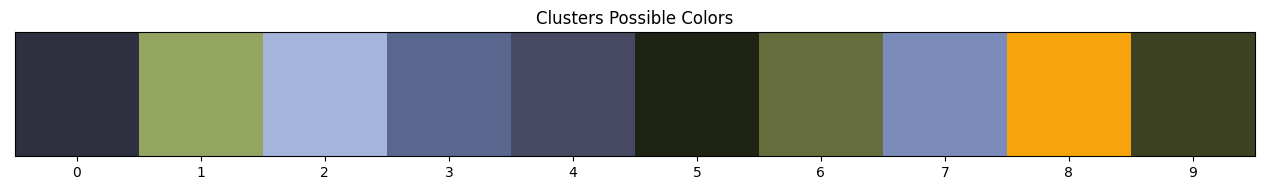

In [57]:
show_colors(kmeans.cluster_centers_)
plt.title('Clusters Possible Colors')

NoneType

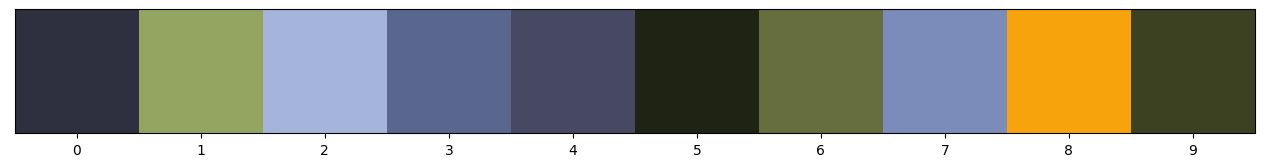

In [60]:
type(show_colors(kmeans.cluster_centers_))

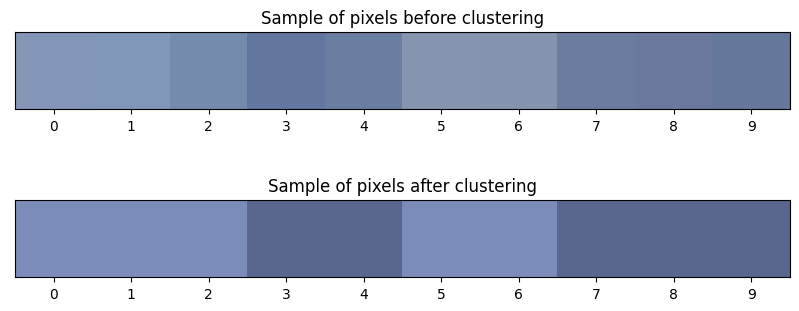

In [75]:
# Create subplots with one row and two columns
fig, axes = plt.subplots(2, figsize=(10, 4))

n=5000000

# Original image palette
palette = np.expand_dims(X_img[n:n+10], axis=0)
num = np.arange(0, len(X_img[n:n+10]))
axes[0].set_xticks(num)
axes[0].set_yticks([])
axes[0].imshow(palette)
axes[0].set_title('Sample of pixels before clustering')

# Compressed image palette
palette_comp = np.expand_dims(X_img_comp[n:n+10], axis=0)
num_comp = np.arange(0, len(X_img_comp[n:n+10]))
axes[1].set_xticks(num_comp)
axes[1].set_yticks([])
axes[1].imshow(palette_comp)
axes[1].set_title('Sample of pixels after clustering')

plt.show()

# Results

In [77]:
np.log2(256),np.log2(10)

(8.0, 3.321928094887362)

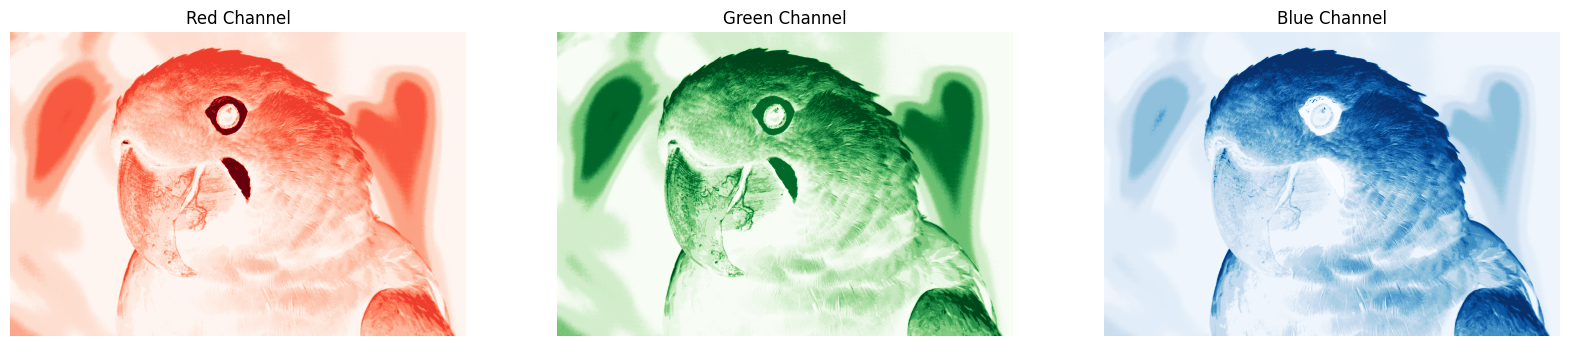

In [78]:
# Separate channels
blue_channel = X_recovered[:, :, 2]
green_channel = X_recovered[:, :, 1]
red_channel = X_recovered[:, :, 0]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Display blue channel
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

# Display green channel
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

# Display red channel
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Original Image')

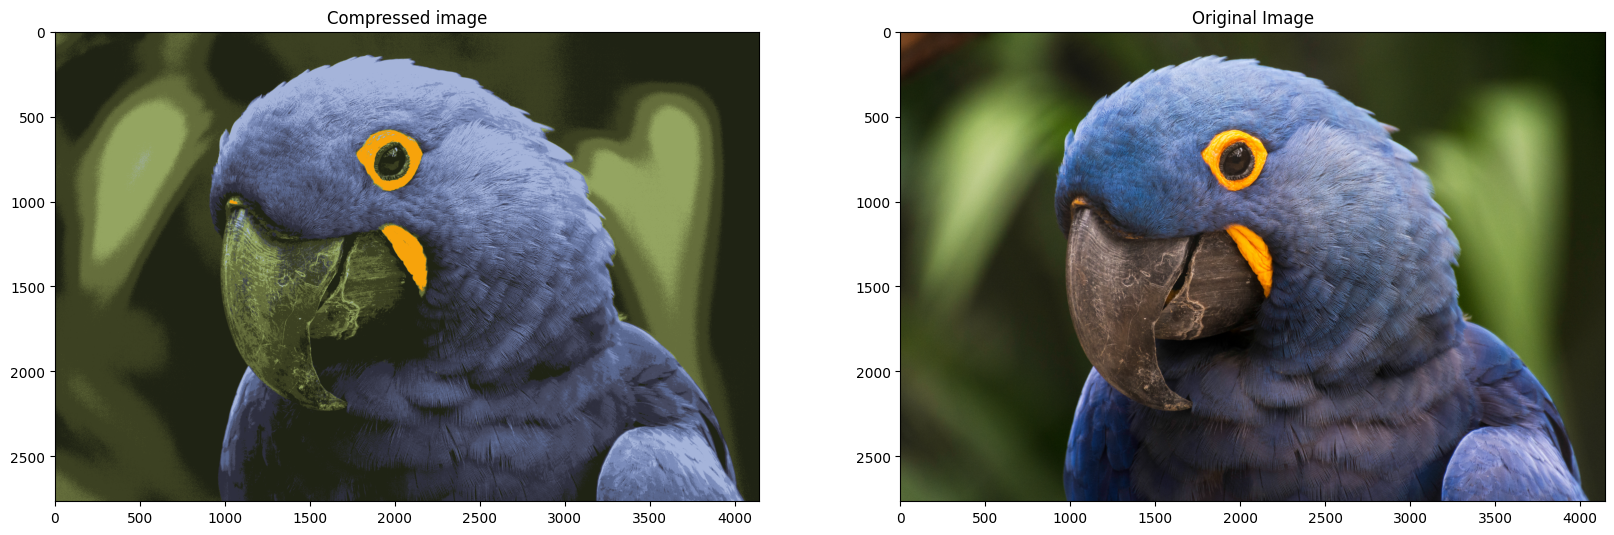

In [79]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(X_recovered)
axes[0].set_title('Compressed image')
axes[1].imshow(original_img)
axes[1].set_title('Original Image')

## Image Sizes

In [80]:
plt.imsave('compressed.png', X_recovered, format='png')
# Verify the file size of the saved image
file_size_bytes = os.path.getsize('compressed.png')
file_size_mb = file_size_bytes / (1024 * 1024)
print(f"Saved Image File Size: {file_size_mb:.2f} MB")

Saved Image File Size: 2.24 MB


In [81]:
plt.imsave('original.png', original_img, format='png')
# Verify the file size of the saved image
file_size_bytes = os.path.getsize('original.png')
file_size_mb = file_size_bytes / (1024 * 1024)
print(f"Saved Image File Size: {file_size_mb:.2f} MB")

Saved Image File Size: 22.85 MB


In [ ]:
file_size_bytes = os.path.getsize('Arara_Azul_no_Pantanal.jpg')
file_size_mb = file_size_bytes / (1024 * 1024)
print(f"Saved Image File Size: {file_size_mb:.2f} MB")

Saved Image File Size: 8.00 MB
